In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Filter data

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [3]:
#Explode job skills

df_DA_US = df_DA_US.explode('job_skills')

In [4]:
#Aggregate salaries by skill

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [5]:
#Create dataframe for top 10 skills by median salary

df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [7]:
#Create dataframe for top 10 skills by frequency

df_DA_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


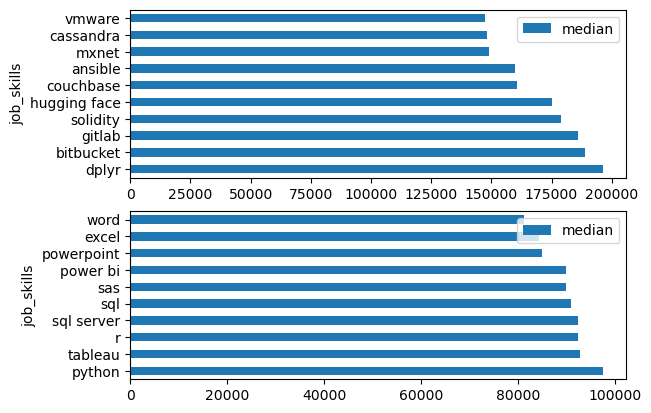

In [10]:
#Plot the dataframes

fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0])
df_DA_skills.plot(kind = 'barh', y = 'median', ax = ax[1])

plt.show()

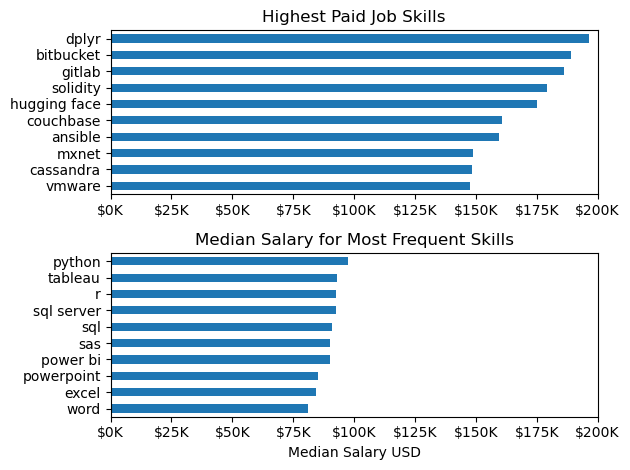

In [18]:
#Format the plots

fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
ax[0].invert_yaxis()
ax[0].set_xlim(0, 200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Highest Paid Job Skills')
df_DA_skills.plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
ax[1].invert_yaxis()
ax[1].set_xlim(0, 200000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary USD')
ax[1].set_ylabel('')
ax[1].set_title('Median Salary for Most Frequent Skills')

fig.tight_layout()
plt.show()